# Principal Component Analysis (PCA) Demo

This notebook demonstrates the implementation and usage of our PCA algorithm for dimensionality reduction and data visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, fetch_olivetti_faces, make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as SklearnPCA

# Import our implementation
from pca import PCA

## 1. Dimensionality Reduction on Iris Dataset

Let's start with a simple example using the Iris dataset to reduce from 4 dimensions to 2.

In [2]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Original data shape: {X_scaled.shape}")
print(f"Features: {feature_names}")

Original data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Apply Our PCA Implementation

In [3]:
# Initialize and apply our PCA
our_pca = PCA(n_components=2)
our_pca.fit(X_scaled)
X_pca_our = our_pca.transform(X_scaled)

print(f"Reduced data shape: {X_pca_our.shape}")

Reduced data shape: (150, 2)


### Compare with scikit-learn's PCA

In [4]:
# Apply scikit-learn's PCA
sklearn_pca = SklearnPCA(n_components=2)
X_pca_sklearn = sklearn_pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {sklearn_pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(sklearn_pca.explained_variance_ratio_):.2f}")

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.96


### Visualize the Results

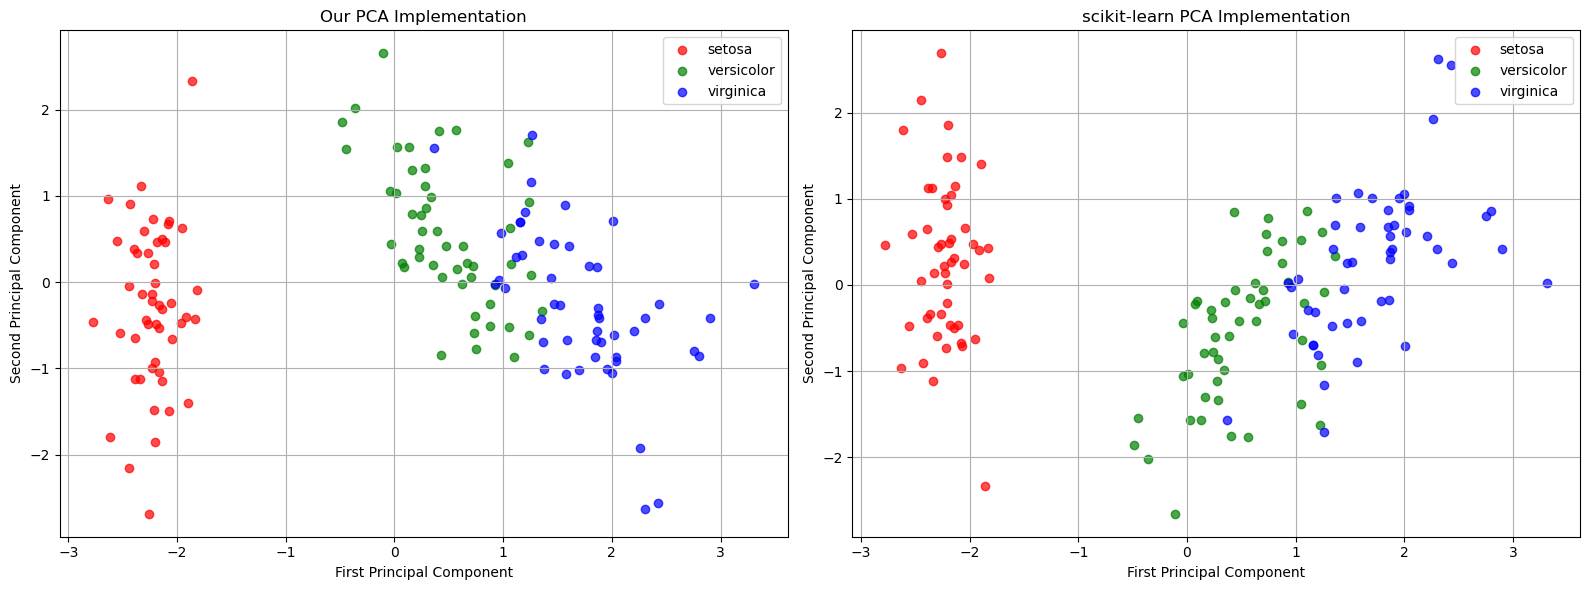

In [5]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot our PCA results
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    ax1.scatter(X_pca_our[y == i, 0], X_pca_our[y == i, 1], 
               color=colors[i], alpha=0.7, lw=1, label=target_name)
ax1.set_title('Our PCA Implementation')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.legend(loc='best')
ax1.grid(True)

# Plot scikit-learn's PCA results
for i, target_name in enumerate(target_names):
    ax2.scatter(X_pca_sklearn[y == i, 0], X_pca_sklearn[y == i, 1], 
               color=colors[i], alpha=0.7, lw=1, label=target_name)
ax2.set_title('scikit-learn PCA Implementation')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.legend(loc='best')
ax2.grid(True)

plt.tight_layout()
plt.show()

## 2. Analyzing Principal Components

Let's examine the principal components and how they relate to the original features.

Principal Components (eigenvectors):
PC1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
PC2: [-0.37741762 -0.92329566 -0.02449161 -0.06694199]


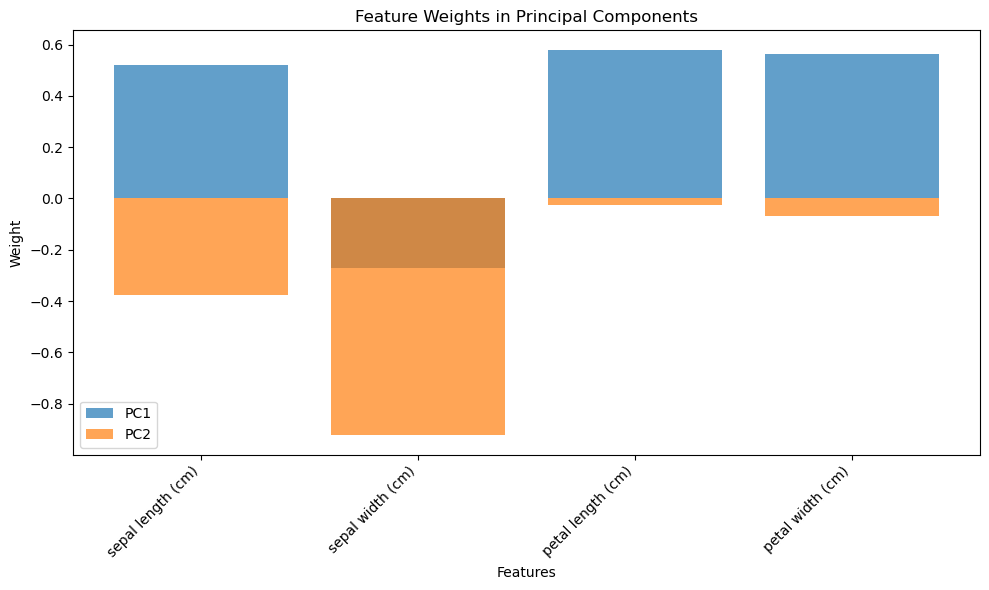

In [6]:
# Display the principal components
print("Principal Components (eigenvectors):")
for i, component in enumerate(our_pca.components):
    print(f"PC{i+1}:", component)

# Visualize component weights
plt.figure(figsize=(10, 6))
for i, component in enumerate(our_pca.components):
    plt.bar(feature_names, component, alpha=0.7, label=f'PC{i+1}')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.title('Feature Weights in Principal Components')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## 3. Facial Recognition Example: Dimensionality Reduction on Faces

Let's apply PCA to a more complex high-dimensional dataset: face images.

In [7]:
# Load face dataset
faces = fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target

print(f"Face data shape: {X_faces.shape}")
print(f"Number of unique individuals: {len(np.unique(y_faces))}")

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ACER\scikit_learn_data
Face data shape: (400, 4096)
Number of unique individuals: 40


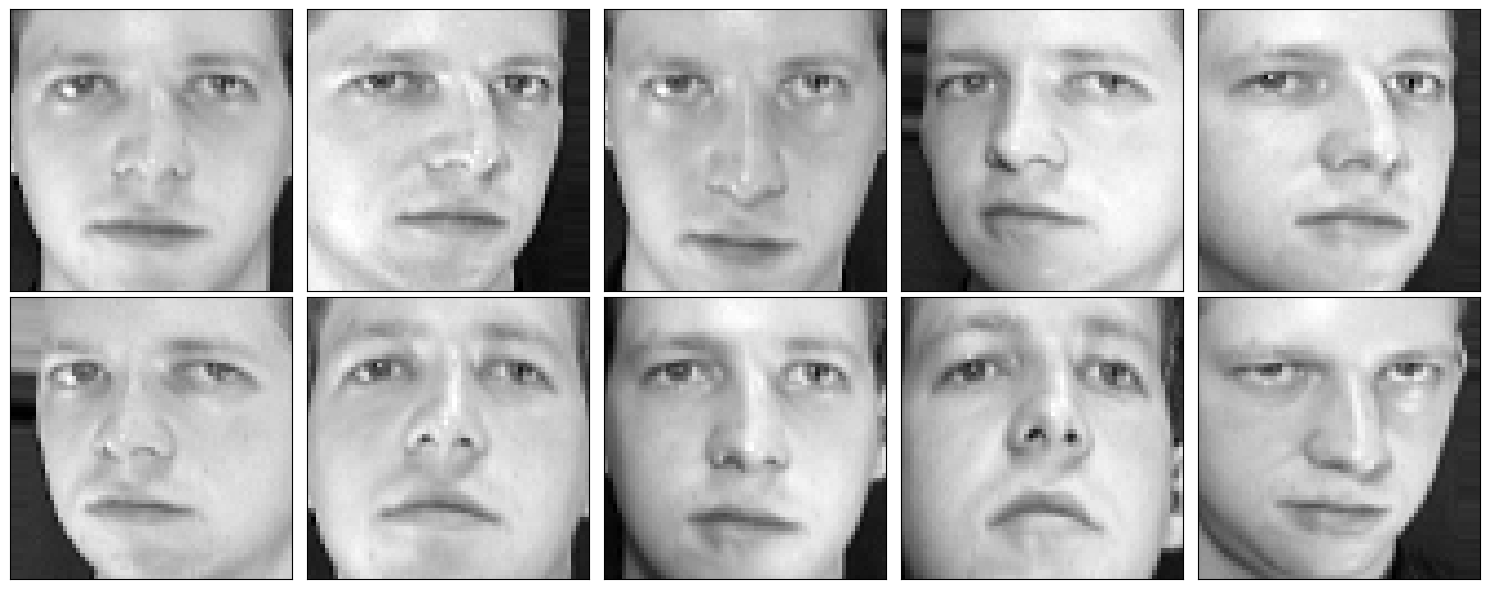

In [8]:
# Display some example faces
fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(X_faces[i].reshape(64, 64), cmap='gray')
plt.tight_layout()
plt.show()

In [9]:
# Apply PCA to faces
n_components = 50  # Reduce from 4096 to 50 dimensions
faces_pca = PCA(n_components=n_components)
faces_pca.fit(X_faces)

# Transform the data
X_faces_pca = faces_pca.transform(X_faces)
print(f"Reduced face data shape: {X_faces_pca.shape}")

Reduced face data shape: (400, 50)


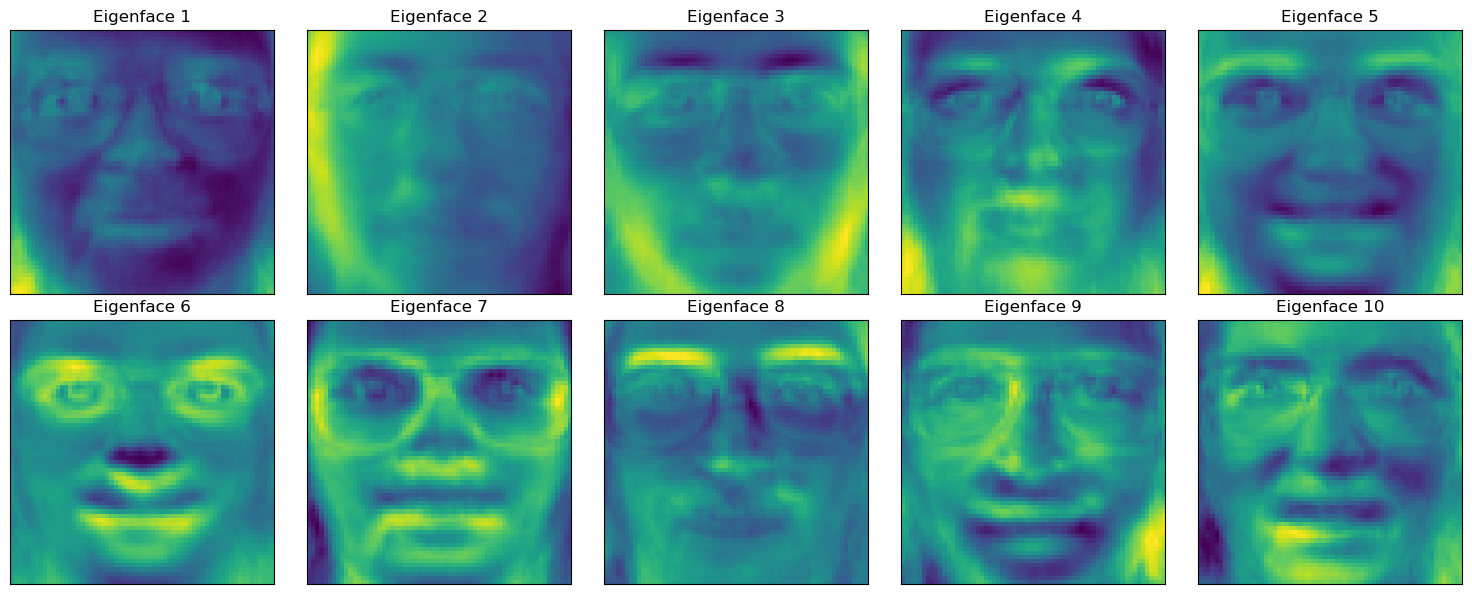

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components[i].real.reshape(64, 64), cmap='viridis')
    ax.set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()


## 4. Visualizing 3D Data in 2D

Let's see how PCA can help visualize 3D data in a 2D space.

Swiss roll data shape: (1000, 3)


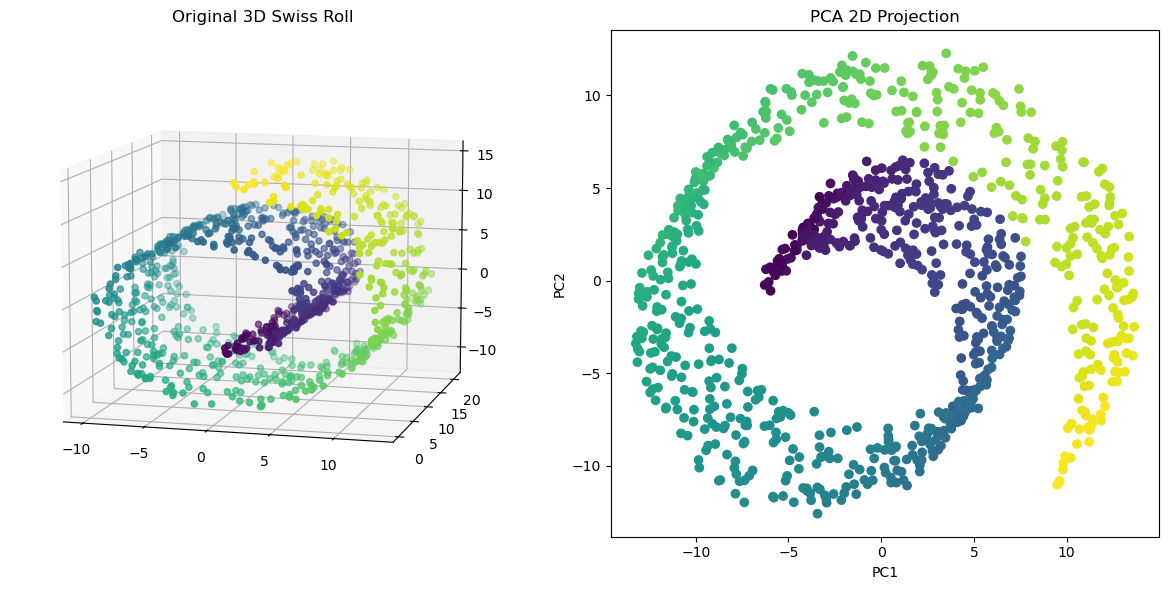

In [16]:
# Generate 3D Swiss Roll dataset
X_swiss, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
print(f"Swiss roll data shape: {X_swiss.shape}")

# Plot the original 3D data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color, cmap='viridis')
ax.set_title('Original 3D Swiss Roll')
ax.view_init(elev=10, azim=-75)

# Apply PCA to reduce to 2D
swiss_pca = PCA(n_components=2)
swiss_pca.fit(X_swiss)
X_swiss_pca = swiss_pca.transform(X_swiss)

# Plot the 2D projection
ax = fig.add_subplot(122)
ax.scatter(X_swiss_pca[:, 0], X_swiss_pca[:, 1], c=color, cmap='viridis')
ax.set_title('PCA 2D Projection')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()